# BOT BF Results

In [212]:
import glob
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

In [213]:
path1 =  '/gpfs/slac/lsst/fs2/u1/devel/jchiang/ts8_offline/10661/'
path2 = '/gpfs/slac/lsst/fs2/u1/devel/jchiang/ts8_offline/10669'

In [214]:
!ls /gpfs/slac/lsst/fs2/u1/devel/jchiang/ts8_offline/10661/

E2V-CCD250-319_10661_bf.fits
E2V-CCD250-319_10661_brighter-fatter.png
E2V-CCD250-319_10661_eotest_results.fits
E2V-CCD250-321_10661_bf.fits
E2V-CCD250-321_10661_brighter-fatter.png
E2V-CCD250-321_10661_eotest_results.fits
E2V-CCD250-350_10661_bf.fits
E2V-CCD250-350_10661_brighter-fatter.png
E2V-CCD250-350_10661_eotest_results.fits
E2V-CCD250-357_10661_bf.fits
E2V-CCD250-357_10661_brighter-fatter.png
E2V-CCD250-357_10661_eotest_results.fits
E2V-CCD250-359_10661_bf.fits
E2V-CCD250-359_10661_brighter-fatter.png
E2V-CCD250-359_10661_eotest_results.fits
E2V-CCD250-361_10661_bf.fits
E2V-CCD250-361_10661_brighter-fatter.png
E2V-CCD250-361_10661_eotest_results.fits
E2V-CCD250-363_10661_bf.fits
E2V-CCD250-363_10661_brighter-fatter.png
E2V-CCD250-363_10661_eotest_results.fits
E2V-CCD250-364_10661_bf.fits
E2V-CCD250-364_10661_brighter-fatter.png
E2V-CCD250-364_10661_eotest_results.fits
E2V-CCD250-365_10661_bf.fits
E2V-CCD250-365_10661_brighter-fatter.png
E2V-CCD250-365_10661_eotest_results.fits
l

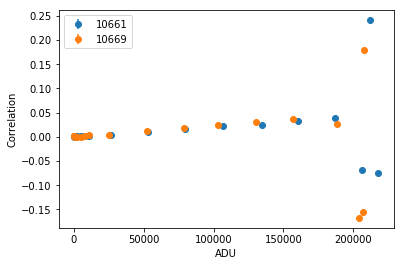

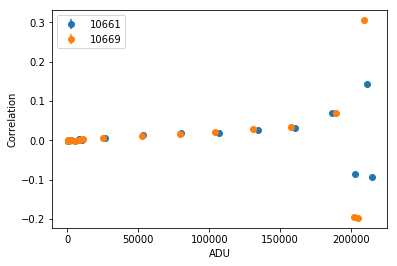

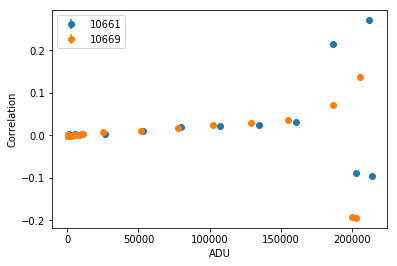

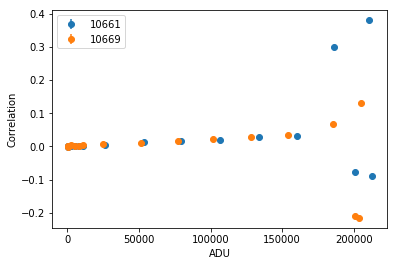

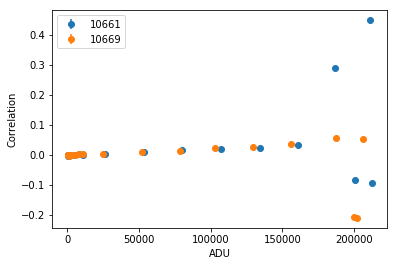

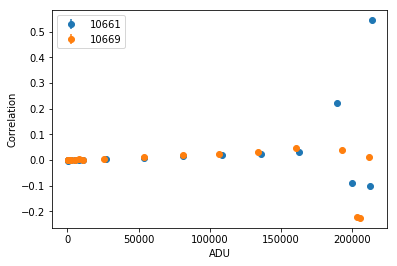

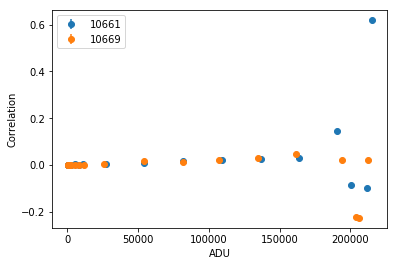

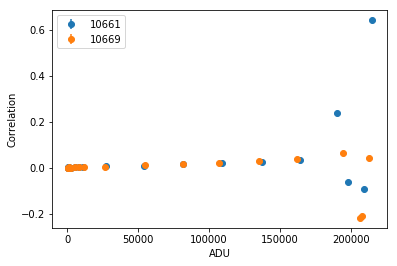

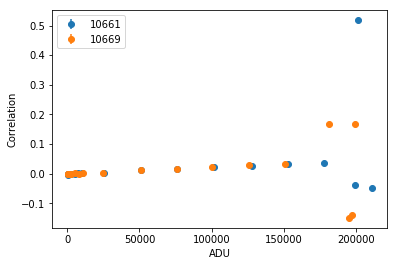

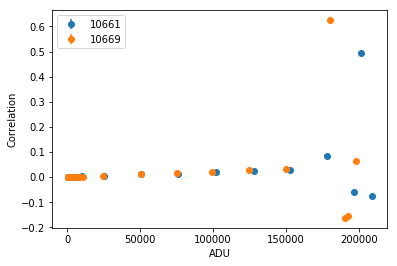

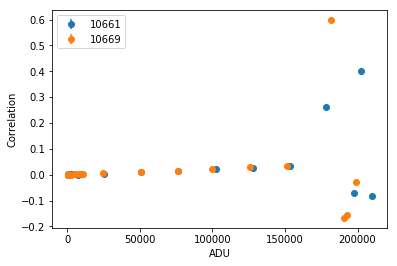

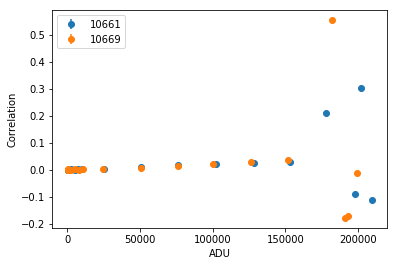

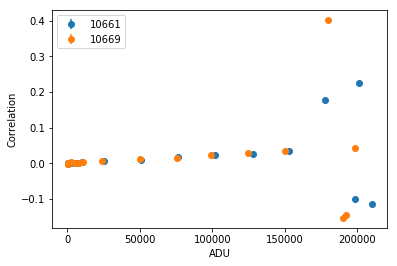

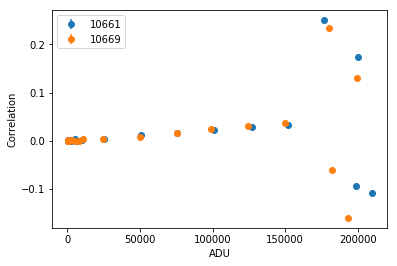

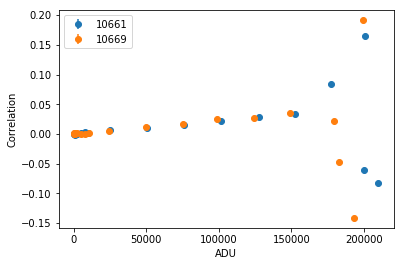

In [215]:
bf_file1 = path1+'/E2V-CCD250-364_10661_bf.fits'#
bf_file2 = path2+'/E2V-CCD250-364_10669_bf.fits'
bf_data1  = fits.open(bf_file1)
bf_data2  = fits.open(bf_file2)
for amp in range(1,16):

    mean1 = bf_data1[1].data.field('AMP%02i_MEAN' % amp)
    xcorr1 = bf_data1[1].data.field('AMP%02i_XCORR' % amp)
    ycorr1 = bf_data1[1].data.field('AMP%02i_YCORR' % amp)
    ycorr_err1 = bf_data1[1].data.field('AMP%02i_YCORR_ERR' % amp)
    
    mean2 = bf_data2[1].data.field('AMP%02i_MEAN' % amp)
    xcorr2 = bf_data2[1].data.field('AMP%02i_XCORR' % amp)
    ycorr2 = bf_data2[1].data.field('AMP%02i_YCORR' % amp)
    ycorr_err2 = bf_data1[1].data.field('AMP%02i_YCORR_ERR' % amp)

    plt.errorbar(mean1,ycorr1,label='10661',yerr=ycorr_err1,fmt='o')
    plt.errorbar(mean2,ycorr2,label='10669',yerr=ycorr_err2,fmt='o')
    plt.ylabel('Correlation')
    plt.xlabel('ADU')
    plt.legend(loc='best')
    plt.show()

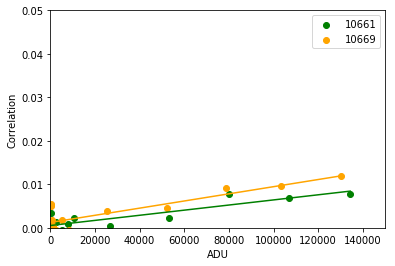

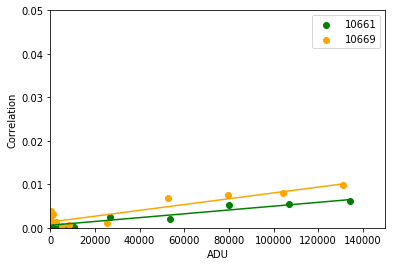

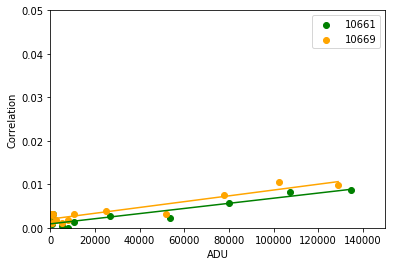

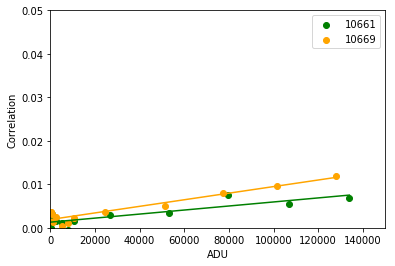

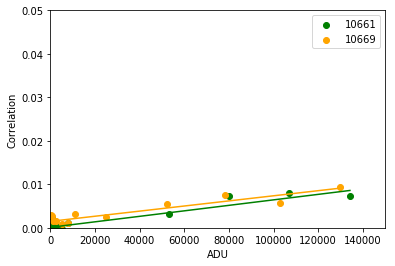

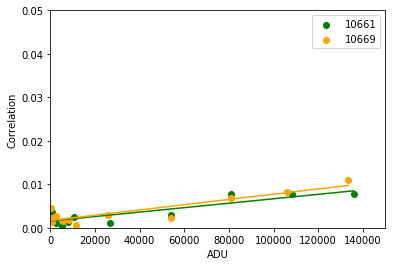

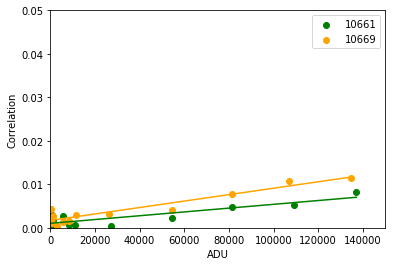

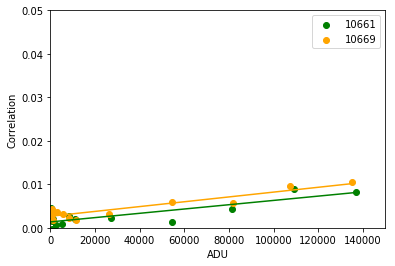

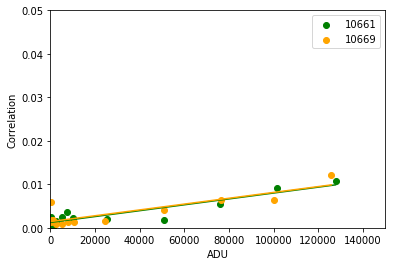

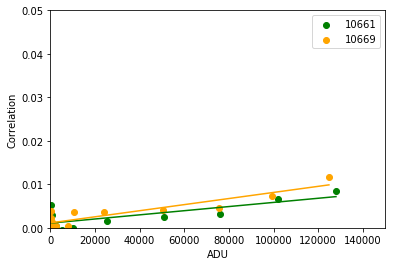

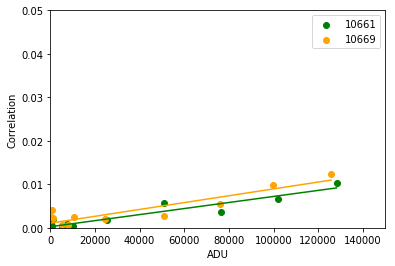

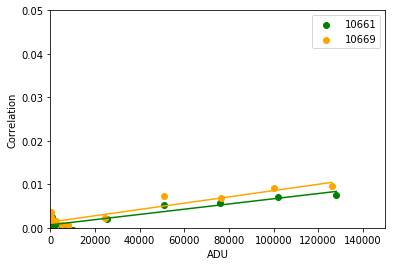

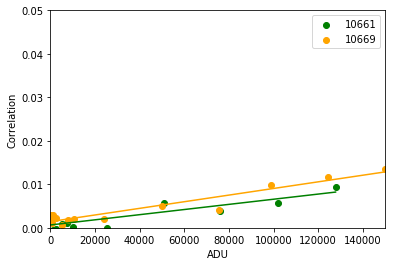

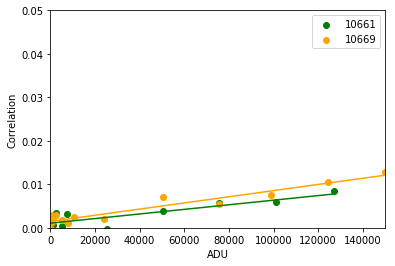

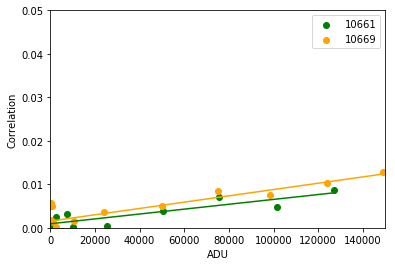

In [208]:
from scipy import stats
adu_max = 150000

# So for all from this CCD data 1 > data 2 
bf_file1 = path1+'/E2V-CCD250-364_10661_bf.fits'#
bf_file2 = path2+'/E2V-CCD250-364_10669_bf.fits'
bf_data1  = fits.open(bf_file1)
bf_data2  = fits.open(bf_file2)


for amp in range(1,16):

    mean1 = bf_data1[1].data.field('AMP%02i_MEAN' % amp)
    xcorr1 = bf_data1[1].data.field('AMP%02i_XCORR' % amp)
    ycorr1 = bf_data1[1].data.field('AMP%02i_YCORR' % amp)
    
    index = np.argsort(mean1)
    mean1 = mean1[index]
    xcorr1 = xcorr1[index]
    index = np.where(mean1 < adu_max)
    
    slope1, intercept, r_value, p_value, std_err = stats.linregress(mean1[index],xcorr1[index])
    line = slope1*mean1[index]+intercept

    plt.scatter(mean1[index], xcorr1[index],c='green',label='10661')
    plt.plot(mean1[index], line,c='green')
    
    mean2 = bf_data2[1].data.field('AMP%02i_MEAN' % amp)
    xcorr2 = bf_data2[1].data.field('AMP%02i_XCORR' % amp)
    ycorr2 = bf_data2[1].data.field('AMP%02i_YCORR' % amp)
    
    index = np.argsort(mean2)
    mean2 = mean2[index]
    xcorr2 = xcorr2[index]
    index = np.where(mean2 < adu_max)
    
    slope2, intercept, r_value, p_value, std_err = stats.linregress(mean2[index],xcorr2[index])
    line = slope2*mean2[index]+intercept

    plt.scatter(mean2[index], xcorr2[index],c='orange',label='10669')
    plt.plot(mean2[index], line[index],c='orange')

    plt.ylim(0,0.05)
    plt.xlim(0,150000)
    plt.ylabel('Correlation')
    plt.xlabel('ADU')
    plt.legend(loc='best')
    plt.show()

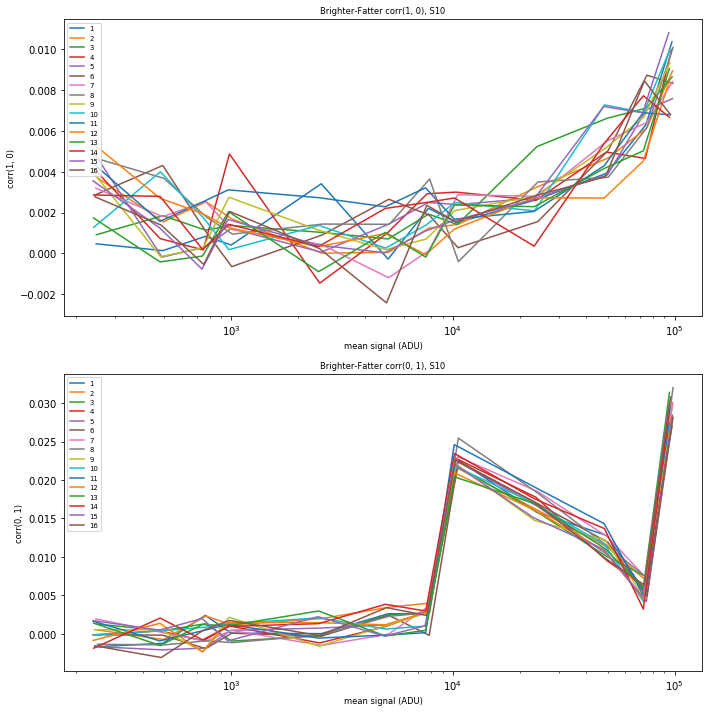

In [209]:
fig = plt.figure(figsize=(10,10))
adu_max = 1e5
with fits.open(bf_file) as bf:

    fig.add_subplot(2, 1, 1)
    for amp in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
        mean = bf[1].data.field('AMP%02i_MEAN' % amp)
        xcorr = bf[1].data.field('AMP%02i_XCORR' % amp)
        index = np.argsort(mean)
        mean = mean[index]
        xcorr = xcorr[index]
        index = np.where(mean < adu_max)
        plt.plot(mean[index], xcorr[index], label='%s' % amp)
    plt.xscale('log')
    plt.xlabel('mean signal (ADU)', fontsize='small')
    plt.ylabel('corr(1, 0)', fontsize='small')
    plt.legend(fontsize='x-small', loc=2)
    plt.title('Brighter-Fatter corr(1, 0), %s' % 'S10',
                      fontsize='small')

    fig.add_subplot(2, 1, 2)
    for amp in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
        mean = bf[1].data.field('AMP%02i_MEAN' % amp)
        ycorr = bf[1].data.field('AMP%02i_YCORR' % amp)
        index = np.argsort(mean)
        mean = mean[index]
        xcorr = xcorr[index]
        index = np.where(mean < adu_max)
        plt.plot(mean[index], ycorr[index], label='%s' % amp)
    plt.xscale('log')
    plt.xlabel('mean signal (ADU)', fontsize='small')
    plt.ylabel('corr(0, 1)', fontsize='small')
    plt.legend(fontsize='x-small', loc=2)
    plt.title('Brighter-Fatter corr(0, 1), %s' % 'S10',
                      fontsize='small')
    plt.tight_layout()

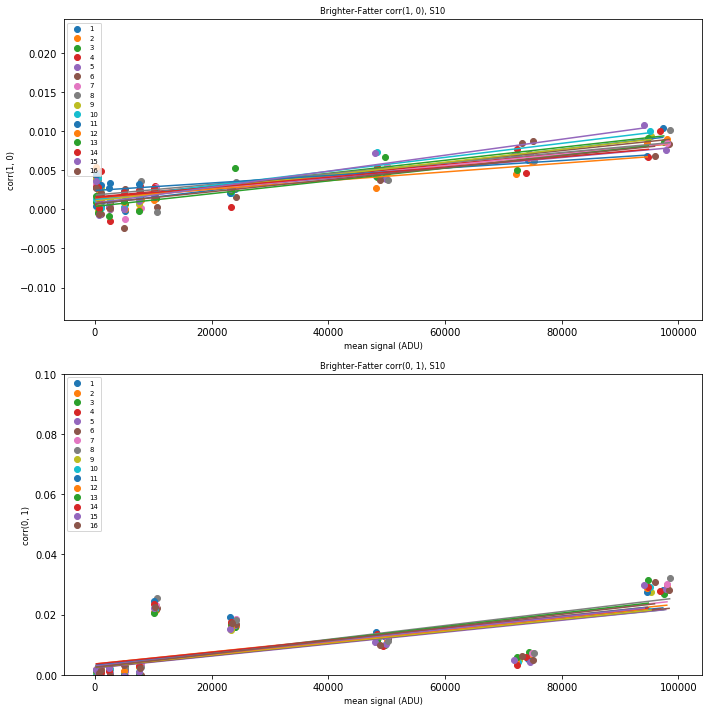

In [210]:
fig = plt.figure(figsize=(10,10))
adu_max = 1e5
with fits.open(bf_file) as bf:

    fig.add_subplot(2, 1, 1)
    for amp in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
        mean = bf[1].data.field('AMP%02i_MEAN' % amp)
        xcorr = bf[1].data.field('AMP%02i_XCORR' % amp)
        index = np.argsort(mean)
        mean = mean[index]
        xcorr = xcorr[index]
        index = np.where(mean < adu_max)
        plt.scatter(mean[index], xcorr[index], label='%s' % amp)
        slope1, intercept, r_value, p_value, std_err = stats.linregress(mean[index],xcorr[index])
        line = slope1*mean[index]+intercept
        plt.plot(mean[index], line)
    plt.xlabel('mean signal (ADU)', fontsize='small')
    plt.ylabel('corr(1, 0)', fontsize='small')
    plt.legend(fontsize='x-small', loc=2)
    plt.title('Brighter-Fatter corr(1, 0), %s' % 'S10',
                      fontsize='small')

    fig.add_subplot(2, 1, 2)
    for amp in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
        mean = bf[1].data.field('AMP%02i_MEAN' % amp)
        ycorr = bf[1].data.field('AMP%02i_YCORR' % amp)
        index = np.argsort(mean)
        mean = mean[index]
        xcorr = xcorr[index]
        index = np.where(mean < adu_max)
        plt.scatter(mean[index], ycorr[index], label='%s' % amp)
        slope1, intercept, r_value, p_value, std_err = stats.linregress(mean[index],ycorr[index])
        line = slope1*mean[index]+intercept
        plt.plot(mean[index], line)
    plt.xlabel('mean signal (ADU)', fontsize='small')
    plt.ylabel('corr(0, 1)', fontsize='small')
    plt.legend(fontsize='x-small', loc=2)
    plt.title('Brighter-Fatter corr(0, 1), %s' % 'S10',
                      fontsize='small')
    plt.ylim(0,0.1)
    plt.tight_layout()

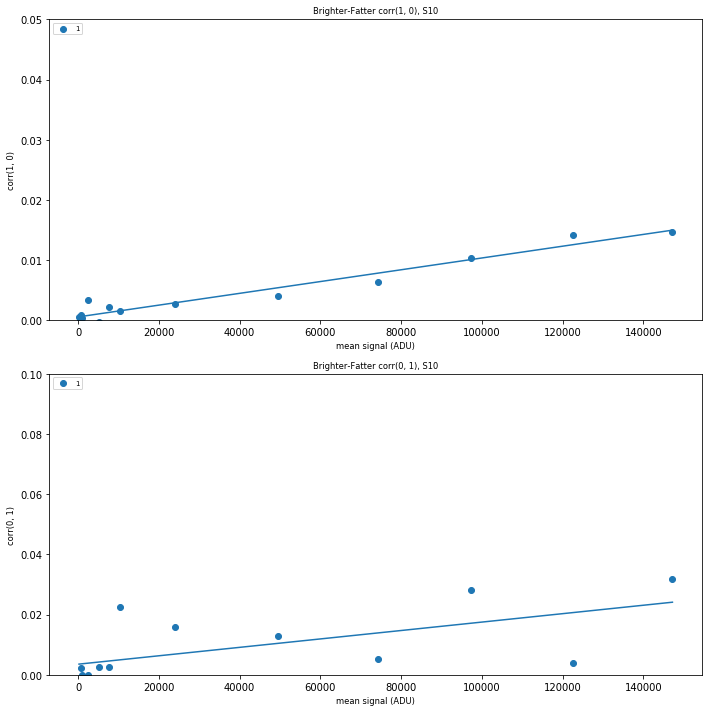

In [211]:
fig = plt.figure(figsize=(10,10))
adu_max = 1e5
with fits.open(bf_file) as bf:

    fig.add_subplot(2, 1, 1)
    for amp in [1]:
        mean = bf[1].data.field('AMP%02i_MEAN' % amp)
        xcorr = bf[1].data.field('AMP%02i_XCORR' % amp)
        index = np.argsort(mean)
        mean = mean[index]
        xcorr = xcorr[index]
        index = np.where(mean < adu_max)
        index = mean<150000
        plt.scatter(mean[index], xcorr[index], label='%s' % amp)
        slope1, intercept, r_value, p_value, std_err = stats.linregress(mean[index],xcorr[index])
        line = slope1*mean[index]+intercept
        plt.plot(mean[index], line)
    plt.ylim(0,0.05)
    plt.xlabel('mean signal (ADU)', fontsize='small')
    plt.ylabel('corr(1, 0)', fontsize='small')
    plt.legend(fontsize='x-small', loc=2)
    plt.title('Brighter-Fatter corr(1, 0), %s' % 'S10',
                      fontsize='small')

    fig.add_subplot(2, 1, 2)
    for amp in [1]:
        mean = bf[1].data.field('AMP%02i_MEAN' % amp)
        ycorr = bf[1].data.field('AMP%02i_YCORR' % amp)
        index = np.argsort(mean)
        mean = mean[index]
        xcorr = xcorr[index]
        index = np.where(mean < adu_max)
        index = mean<150000
        plt.scatter(mean[index], ycorr[index], label='%s' % amp)
        slope1, intercept, r_value, p_value, std_err = stats.linregress(mean[index],ycorr[index])
        line = slope1*mean[index]+intercept
        plt.plot(mean[index], line)
    plt.xlabel('mean signal (ADU)', fontsize='small')
    plt.ylabel('corr(0, 1)', fontsize='small')
    plt.legend(fontsize='x-small', loc=2)
    plt.title('Brighter-Fatter corr(0, 1), %s' % 'S10',
                      fontsize='small')
    plt.ylim(0,0.1)
    plt.tight_layout()